# BIFROST UNION Backend

In [1]:
import mcstasscript as ms
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mcstasscript.tools.ncrystal_union import add_ncrystal_union_material

#my_configurator = ms.Configurator()
#my_configurator.set_mcrun_path("/Applications/McStas-3.4.app/Contents/Resources/mcstas/3.4/bin/")
#my_configurator.set_mcstas_path("/Applications/McStas-3.4.app/Contents/Resources/mcstas/3.4/")

""" These line are nessecary in the mcstas test enviroment for the code to compile """

my_configurator = ms.Configurator()
my_configurator.set_mcrun_path("/Users/kristinekrighaar/opt/anaconda3/envs/mcstas_test/bin/")
my_configurator.set_mcstas_path("/Users/kristinekrighaar/opt/anaconda3/envs/mcstas_test/share/mcstas/resources")

### Importing all the detector backend information

In [2]:
ana = pd.read_csv(r'backend_information_Analyzer_information.csv')
ana = ana.replace(',','.', regex=True)
ana = ana.astype(float)

det = pd.read_csv(r'backend_information_Detector_information.csv')
det = det.replace(',','.', regex=True)
det = det.astype(float)


## Making the virtual source

In [3]:
bi_end = ms.McStas_instr("backend_Pb_1t", input_path="run_folder", output_path="../DataConversionMJOLNIR/pb_phonon_1t")

##### Setting instrument parameters #####
#E0 = bi_end.add_parameter("E0")
#dE = bi_end.add_parameter("dE")

#E0.value = 5.0
#dE.value = 0.1

A4 = bi_end.add_parameter("A4", comment="Scattering angle from sample")
A4.value = 30 # 

A3 = bi_end.add_parameter("A3", comment="Sample rotation angle")
A3.value = 0 # 

bi_end.add_declare_var("int", "wedge")

std_setting = '"HighFlux_OptimalLamBand.mcpl"' # bi_end.add_parameter("std_setting", comment="Name of .mcpl file for standard setting")


EndOfGuideToSampleLength = 0.58




The following components are found in the work_directory / input_path:
     Union_abs_logger_1D_space_event.comp
     Monochromator_flat.comp
     Phonon_simple.comp
These definitions will be used instead of the installed versions.


## Sample Environment

In [4]:

"""
Virtual source for backend, either Source simple or MCPL file (Later to be included)
"""
##### Source simple #####
#source = bi_end.add_component("source", "Source_simple", AT=[0, 0, 0], RELATIVE="ABSOLUTE")
#source.set_parameters(radius = 0.5, yheight=0.01, xwidth=0.01, focus_xw=0.005, focus_yh=0.005, dist = EndOfGuideToSampleLength, E0=E0, dE=dE)

##### Virtual MCPL source #####

virtual_source = bi_end.add_component("Vir_source", "MCPL_input", RELATIVE="ABSOLUTE")
virtual_source.filename = std_setting
virtual_source.Emin = 4.5
virtual_source.Emax = 17
virtual_source.E_smear = 0.001
virtual_source.pos_smear = 0.001
virtual_source.dir_smear = 0.05


sample_pos = bi_end.add_component("sample_pos", "Arm", AT=[0, 0, EndOfGuideToSampleLength], ROTATED=[0, 0, 0], RELATIVE="ABSOLUTE")
A3_rot = bi_end.add_component("A3_rot", "Arm", AT=[0, 0, 0], ROTATED=[0, "A3", 0], RELATIVE="sample_pos") # Sample needs to be relative to this arm
A4_rot = bi_end.add_component("A4_rot", "Arm", AT=[0, 0, 0], ROTATED=[0, "A4", 0], RELATIVE="sample_pos") # Detector tank components needs to be relative to this arm

# E_mon_before = bi_end.add_component("E_mon_before","E_monitor", AT=[0, 0, 0.5], ROTATED=[0, 0, 0], RELATIVE="Vir_source")
# E_mon_before.nE = 100
# E_mon_before.filename = '"E_mon_before.dat"'
# E_mon_before.xwidth = 0.1
# E_mon_before.yheight = 0.1
# E_mon_before.Emin = 0
# E_mon_before.Emax = 15
# E_mon_before.restore_neutron = 1

"""
Sample enviroment
"""
####### Advanced UNION sample



####### Incoherent sample

# incoherent_sample = bi_end.add_component("Incoherent_sample", "Incoherent", AT=[0,0,0], ROTATED=[0, 0, 0], RELATIVE="A3_rot")
# incoherent_sample.xwidth = 0.01
# incoherent_sample.yheight = 0.01
# incoherent_sample.zdepth = 0.01
# incoherent_sample.Etrans = 0.0
# incoherent_sample.deltaE = 0.0001
# incoherent_sample.target_x = "sin((A4 + 40 - A3) * M_PI / 180.0)"
# incoherent_sample.target_z = "cos((A4 + 40 - A3) * M_PI / 180.0)"
# incoherent_sample.target_y = 0
# incoherent_sample.focus_ah = 8 #np.deg2rad(8)
# incoherent_sample.focus_aw = 180 # np.deg2rad(180)
# incoherent_sample.order = 1

# bi_end.add_component("check", "Arm", AT=["sin((A4 + 40 - A3) * M_PI / 180.0)", 0, "cos((A4 + 40 - A3) * M_PI / 180.0)"], RELATIVE="Incoherent_sample")

####### Phonon simpel

# phonon_sample = bi_end.add_component("phonon_sample", "Phonon_simple", AT=[0,0,0], ROTATED=[0, 0, 0], RELATIVE="A3_rot")
# phonon_sample.radius = 0.0025
# phonon_sample.yheight = 0.005
# phonon_sample.sigma_abs = 0.171
# phonon_sample.sigma_inc = 0.003
# phonon_sample.a = 4.95
# phonon_sample.b = 9.4
# phonon_sample.M = 207.2
# phonon_sample.c = 10.0
# phonon_sample.DW = 1.0
# phonon_sample.T = 290.0
# phonon_sample.target_x = "sin((A4 + 40 - A3) * PI / 180.0)"
# phonon_sample.target_z = "cos((A4 + 40 - A3) * PI / 180.0)"
# phonon_sample.focus_ah = np.deg2rad(8)
# phonon_sample.focus_aw = np.deg2rad(110)


####### Res_sample
# E0 = bi_end.add_parameter("E0", comment="E0 of res_sample")
# E0.value = 5# 

# dE = bi_end.add_parameter("dE", comment="Width of signal E0")
# dE.value = 0.1

# res_sample = bi_end.add_component("res_sample", "Res_sample", AT=[0,0,0], ROTATED=[0, 0, 0], RELATIVE="A3_rot")
# res_sample.yheight = 0.005
# res_sample.xwidth = 0.005
# res_sample.zdepth = 0.005
# res_sample.E0 = "E0"
# res_sample.dE = "dE"
# res_sample.target_x = "sin((A4 + 40 - A3) * M_PI / 180.0)"
# res_sample.target_y = 0
# res_sample.target_z = "cos((A4 + 40 - A3) * M_PI / 180.0)"
# res_sample.focus_ah = 8
# res_sample.focus_aw = 110

####### Powder sample

# powder_sample = bi_end.add_component("pow_sample", "PowderN", AT=[0,0,0], ROTATED=[0, 0, 0], RELATIVE="A3_rot")
# powder_sample.reflections = '"Na2Ca3Al2F14.laz"'
# powder_sample.radius = 0.005
# powder_sample.yheight = 0.01
# powder_sample.d_omega = 300
# powder_sample.d_phi = 8
# powder_sample.delta_d_d = 0
# powder_sample.DW = 1






In [ ]:
init = bi_end.add_component("init", "Union_init") # This component has to be called init

phonon1.radius = 0.0025
phonon1.yheight = 0.005
phonon1.target_x = "sin((A4 + 40 - A3) * PI / 180.0)"
phonon1.target_z = "cos((A4 + 40 - A3) * PI / 180.0)"
phonon1.focus_ah = np.deg2rad(8)
phonon1.focus_aw = np.deg2rad(110)

phonon1 = bi_end.add_component("phonon1", "PhononSimple_process")
phonon1.a = 4.95
phonon1.b = 9.4
phonon1.M = 207.2
phonon1.c = 0.5
phonon1.DW = 1.0
phonon1.T = 290.0
phonon1.gap = 0.4

phonon2 = bi_end.add_component("phonon2", "PhononSimple_process")
phonon2.a = 5.5
phonon2.b = 9.4
phonon2.M = 207.2
phonon2.c = 0.3
phonon2.DW = 1.0
phonon2.T = 290.0
phonon2.gap = 0.2

E_line = bi_end.add_component("Elastic_line", "Incoherent_process")
E_line.sigma = 2*0.0082 # 2 atoms per unit cell
E_line.unit_cell_volume = 66.4

flat1 = bi_end.add_component("flat1", "Incoherent_process")
flat1.sigma = 2*0.0082 # 2 atoms per unit cell
flat1.unit_cell_volume = 66.4

flat2 = bi_end.add_component("flat2", "Incoherent_process")
flat2.sigma = 2*0.0082 # 2 atoms per unit cell
flat2.unit_cell_volume = 66.4



In [5]:
# E_mon_after = bi_end.add_component("E_mon_after","E_monitor", AT=[0, 0, 0.5], ROTATED=[0, 0, 0], RELATIVE="A3_rot")
# E_mon_after.nE = 100
# E_mon_after.filename = '"E_mon_after.dat"'
# E_mon_after.xwidth = 0.5
# E_mon_after.yheight = 0.5
# E_mon_after.Emin = 0
# E_mon_after.Emax = 15
# E_mon_after.restore_neutron = 1

#bi_end.component_help('E_monitor')
#print(A4.value)s

In [6]:
#bi_end.show_components()

## Using 'classical' McStas components

In [7]:
Detector_names = []


def make_backend_set(wedge_num, energy, energy_string, priority_offset, ang_offset, wedge_name):
    wedge_info = ana[ana["wedge_number"] == wedge_num]
    ana_en_info = wedge_info[wedge_info["Energy"] == energy]
    arm_info = np.squeeze(ana_en_info[ana_en_info["Blade_number"] == 1].to_numpy())

    wedge_info_det = det[det["Wedge number"] == wedge_num]
    det_info = np.squeeze(wedge_info_det[wedge_info_det["Energy"] == energy].to_numpy())
    
    
    ana_arm = bi_end.add_component("ana_arm_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name), "Arm", AT=[0, 0, arm_info[3]], ROTATED=[0, 0, 0], RELATIVE="wedge_arm"+"_"+str(ang_offset))
    
    for i in range(len(ana_en_info)):
        info = np.squeeze(ana_en_info[ana_en_info["Blade_number"] == i+1].to_numpy())
        
        crystal_name = "PG_piece_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(i)+"_"+str(wedge_name)

        PG_piece = bi_end.add_component(crystal_name,"Monochromator_flat", AT=[0, info[8]/1000, info[7]/1000], ROTATED=[-(90-info[9]), 90, 0], RELATIVE=ana_arm)
        PG_piece.set_parameters(zwidth=info[5], yheight=info[6], DM=3.355, mosaich=50, mosaicv=50)
        PG_piece.append_EXTEND("if (SCATTERED) {wedge = "+str(wedge_name)+";};")

        
    ########################################### Making the detector section #########################################
    
    det_arm = bi_end.add_component(
        "det_arm_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name), "Arm",
        AT=[0, det_info[3], det_info[2]], ROTATED=[0, 0, 0], RELATIVE="wedge_arm"+"_"+str(ang_offset))
    
    
    # det_0_He3 = bi_end.add_component("det_close_He3_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name), "Monitor_nD", AT=[0, np.tan(np.radians(2*info[9]-90))*(2*0.0127+0.001), -(2*0.0127+0.001)], ROTATED=[0,0,90], RELATIVE="det_arm_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name))
    # det_0_He3.options = '"cylinder, y, bins=100, t, limits=[0.05 0.3], bins=1000]"'
    # det_0_He3.xwidth = 0.0127*2#-0.001
    # det_0_He3.yheight = det_info[4]
    # det_0_He3.filename = '"'+"signal_1Dspace_"+str(wedge_name)+"_"+str(energy_string)+"_0.dat"+'"'
    # det_0_He3.set_WHEN("wedge == "+str(wedge_name))


    det_1_He3 = bi_end.add_component("det_mid_He3_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name), "Monitor_nD", AT=[0, 0, 0], ROTATED=[0,0,90], RELATIVE="det_arm_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name))
    det_1_He3.options = '"cylinder, y, bins=100, t, limits=[0.05 0.3], bins=1000]"'
    det_1_He3.xwidth = 0.0127*2#-0.001
    det_1_He3.yheight = det_info[4]
    det_1_He3.filename = '"'+"signal_1Dspace_"+str(wedge_name)+"_"+str(energy_string)+"_1.dat"+'"'
    det_1_He3.set_WHEN("wedge == "+str(wedge_name))

    # det_2_He3 = bi_end.add_component("det_far_He3_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name), "Monitor_nD", AT=[0, -np.tan(np.radians(2*info[9]-90))*(2*0.0127+0.001), (2*0.0127+0.001)], ROTATED=[0,0,90], RELATIVE="det_arm_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name))
    # det_2_He3.options = '"cylinder, y, bins=100, t, limits=[0.05 0.3], bins=1000]"'
    # det_2_He3.xwidth = 0.0127*2#-0.001
    # det_2_He3.yheight = det_info[4]
    # det_2_He3.filename = '"'+"signal_1Dspace_"+str(wedge_name)+"_"+str(energy_string)+"_2.dat"+'"'
    # det_2_He3.set_WHEN("wedge == "+str(wedge_name))
    
    # Detector_names.append("det_0_He3_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name))
    # Detector_names.append("det_1_He3_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name))
    # Detector_names.append("det_2_He3_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name))

    
#print(make_backend_set(1,5.0,"5p0",5,0))

### Making a wedge

In [8]:


def make_a_wedge(wedge_type, priority_offset, ang_offset, wedge_name):
    wedge_arm = bi_end.add_component("wedge_arm"+"_"+str(ang_offset), "Arm", AT=[0, 0, 0], ROTATED=[0, ang_offset, 0], RELATIVE="A4_rot")
    for i in range(len(energy)):
        make_backend_set(wedge_type, energy[i], energy_string[i], priority_offset+i, ang_offset, wedge_name) # wedge_num, energy, energy_string, priority_offset
        
    
#print(make_a_wedge(1,1,20,1))

# Build full BIFROST Backend

In [9]:

energy = np.array([5.0])#, 3.2, 3.8, 4.4, 5.0])
energy_string = np.array([4])#, "3p2", "3p8", "4p4", "5p0"]) ARC name

ang_offset = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80]) # which angular offsets should each wedge be at (-40, -30, -20, -10, 0, 10, 20, 30, 40)

wedge_types = np.array([1, 2, 3, 1, 2, 3, 1, 2, 3]) # What type each wegde should be 
wedge_names = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8]) # what should be the name of each wedge


def Build_BIFROST(wedge_types, ang_offset, wedge_names):
    for i in range(len(wedge_types)):
        make_a_wedge(wedge_types[i], ang_offset[i], ang_offset[i], wedge_names[i])

print(Build_BIFROST(wedge_types, ang_offset, wedge_names))


None


In [10]:
#master = bi_end.add_component("master", "Union_master")
#stop = bi_end.add_component("stop", "Union_stop")

# Running the instrument simuation

In [11]:
A4_settings = [70]
#A3_settings = np.arange(10, 100, 1, dtype='float')

for i in A4_settings:
    #for j in A3_settings:
    bi_end.set_parameters(A3=55, A4=i)
    bi_end.settings()  # NeXus=True
    data = bi_end.backengine();


INFO: Using directory: "/Users/kristinekrighaar/Documents/BIFROST/McStasScript/../DataConversionMJOLNIR/pb_phonon_1t_0"
INFO: Regenerating c-file: backend_Pb_1t.c
CFLAGS= -Wl,-rpath,CMD(mcpl-config --show libdir) -LCMD(mcpl-config --show libdir) -lmcpl -ICMD(mcpl-config --show includedir)
      
-----------------------------------------------------------

Generating single GPU kernel or single CPU section layout: 

-----------------------------------------------------------

Generating GPU/CPU -DFUNNEL layout:

-----------------------------------------------------------
INFO: Recompiling: ./backend_Pb_1t.out
./backend_Pb_1t.c:6514:5: warning: non-void function does not return a value [-Wreturn-type]
    }
    ^
./backend_Pb_1t.c:6537:5: warning: non-void function does not return a value [-Wreturn-type]
    }
    ^
./backend_Pb_1t.c:18455:37: warning: format specifies type 'unsigned long' but the argument has type 'unsigned long long' [-Wformat]
               (long unsigned)repeat_cou

In [12]:

data

[
 McStasData: det_mid_He3_1_4_0 type: 2D  I:0.452812 E:0.044027 N:185.0,
 
 McStasData: det_mid_He3_2_4_1 type: 2D  I:0.811284 E:0.080375 N:185.0,
 
 McStasData: det_mid_He3_3_4_2 type: 2D  I:2.04168 E:0.219895 N:147.0,
 
 McStasData: det_mid_He3_1_4_3 type: 2D  I:14.3618 E:1.079 N:299.0,
 
 McStasData: det_mid_He3_2_4_4 type: 2D  I:259.348 E:27.5014 N:938.0,
 
 McStasData: det_mid_He3_3_4_5 type: 2D  I:0.0 E:0.0 N:0.0,
 
 McStasData: det_mid_He3_1_4_6 type: 2D  I:0.0 E:0.0 N:0.0,
 
 McStasData: det_mid_He3_2_4_7 type: 2D  I:0.0 E:0.0 N:0.0,
 
 McStasData: det_mid_He3_3_4_8 type: 2D  I:0.0 E:0.0 N:0.0]

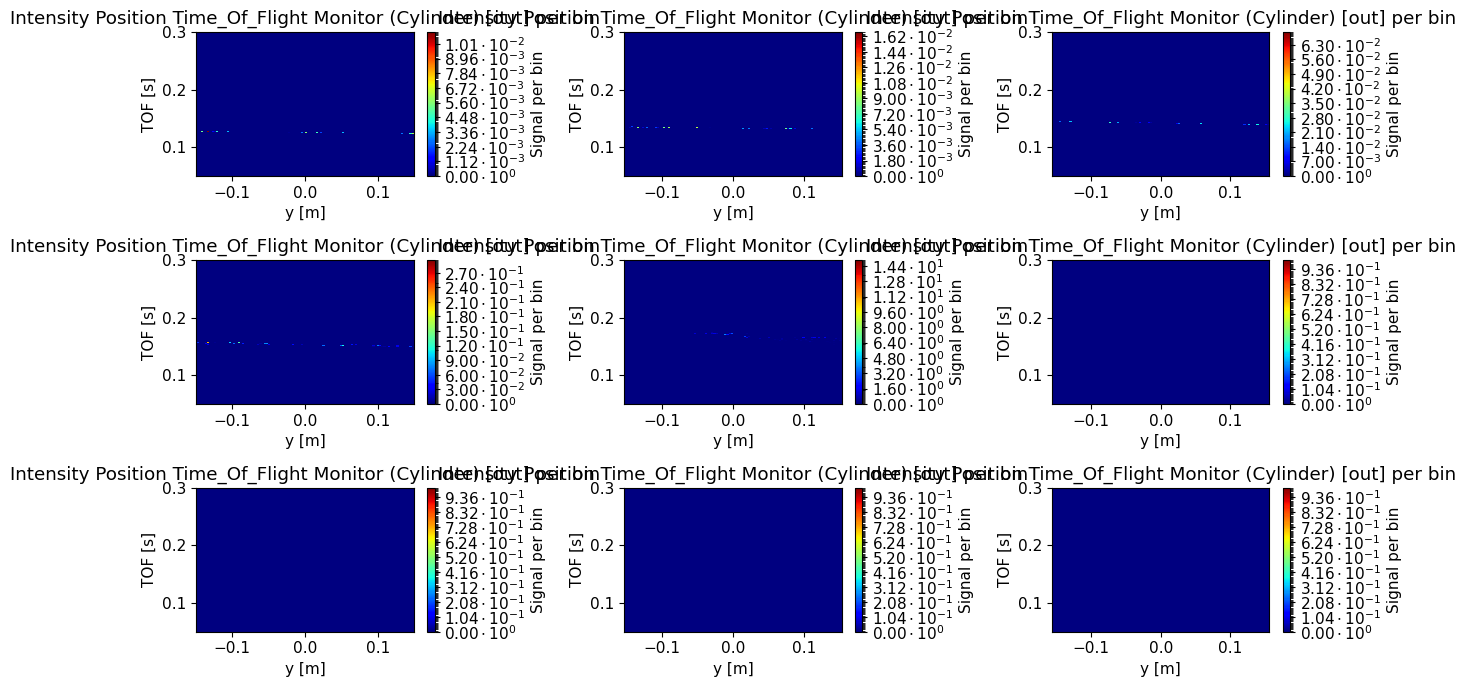

In [13]:

ms.make_sub_plot(data)